
# PS2: Mini-batch SGD, CNN, and RNN

Advanced Learning 2025/6.



For SUBMISSION:   

Please upload the complete and executed `ipynb` to your git repository. Verify that all of your output can be viewed directly from github, and provide a link to that git file below.

~~~
STUDENT ID: 212377717
~~~

~~~
STUDENT GIT LINK: https://github.com/yaelevy/Computational-Learning-and-Data-Analysis/tree/main/ex2
~~~
In Addition, don't forget to add your ID to the files, and upload to moodle the html version:    
  
`PS2_CNN_RNN_2024_ID_212377717.html`   




---


Imports:

In [1]:
import numpy as np # You are allowed to use  only numpy.
import time, sys, cProfile
import matplotlib.pyplot as plt

Please import the objects in `src.py` file into the workspace

In [2]:
#from google.colab import drive
#drive.mount("/content/drive/")

In [3]:
#your_drive_path_to_src_file = "/content/drive/MyDrive/"
#sys.path.append(your_drive_path_to_src_file)


In [4]:
from src import *

Note that now all of the network's objects from PS1 are loaded into the workspace.

Alternatively, you can upload src.py in the files tab found on the left hand side if you are using colab.

---

### 0. Loading data

As in PS1, you will evaluate your home-made network on the `mnist` dataset.   
The MNIST dataset is a large dataset of handwritten digits that is commonly used for training various image and vision models.  



In [5]:
from keras.datasets import mnist
from keras.utils import to_categorical
# load MNIST from server
# Using a standard library (keras.datasets) to load the mnist data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


---

## PS2 Part 1: Mini-batch SGD



**Welcome back**.   






Mini-batch Stochastic Gradient Descent (Mini-batch SGD) is an optimization algorithm used to train machine learning models, particularly neural networks. It strikes a balance between two other methods:

    Batch Gradient Descent – Uses the entire dataset to compute gradients and update the model parameters.
        ✅ Accurate gradients
        ❌ Slow and memory-intensive for large datasets

    Stochastic Gradient Descent (SGD) – Uses a single data point to compute gradients for each update.
        ✅ Fast and efficient
        ❌ Noisy updates, which can lead to instability

  
**Mini-batch SGD**.

Mini-batch SGD computes gradients and updates the model parameters using small, randomly selected batches of data (typically 32, 64, or 128 samples).

    ✅ Faster than batch gradient descent
    ✅ Less noisy than pure SGD
    ✅ Efficient use of memory
    ✅ Enables vectorization for faster computation on GPUs

**How it Works**.

    Shuffle the dataset to avoid bias.

    Divide the data into small batches (e.g., 64 samples per batch).

    For each epoch, iterate through the mini-batches:
        Perform forward pass to calculate predictions.
        Compute the loss for the mini-batch.
        Perform backpropagation to compute gradients.
        Update model parameters using the gradients.

    Repeat until the model converges.

**Algorithm**

For each mini-batch $B={x_1,x_2,...,x_m}B={x_1​,x_2​,...,x_m​}$ of size $m$, update the weights $w$ as:    

$$
w=w−η⋅\frac{1}{m}∑_{i=1}^m ∇L(w,x_i)
$$

Where:   
*  $η$ = learning rate.
* $∇L(w,x_i)$ = gradient of the loss for sample $x_i$.   

Advantages

    Efficient and scalable – Works well with large datasets.
    Smooth convergence – Less noisy than SGD but faster than full batch training.
    Parallelization – Batches can be processed in parallel on GPUs.

Disadvantages

    Choosing batch size can affect performance. Small batches lead to noise, large batches consume more memory.
    Convergence may be slower than batch gradient descent for some problems.


### Mini-batch Questions.
**P1Q1**:  

Please answer the following questions providing statistical justifications and mathematical formulas when needed.

P1Q1a: Explain how the mini-batch size impacts convergence, model performance, and computational efficiency.



Choosing the mini batch size is critical when running mini batch SGD.
If we choose mini batch size too large, we will get closer to Batch GD => the convegence will be to the right direction but each batch will take a long time to compute due to complexity of gradients to caculate, and it requires more memory.
If we choose a mini batch size too small, the gradients will be more similar to SGD leading fast computations per batch but they will be noisy and lead to an unstable model.
In order to optimize the computetional efficiency and still converge fast the size needs to be something in the middle.

**P1Q1b:**   
Why does mini-batch SGD require a learning rate schedule, and what are the common scheduling strategies?



Mini batch SGD is more sensitive to noise because small bathces lead to high variance\noised gradients, so there is a special need to adjust the learning rate along the process. At the beggining the weights will be randomized and each calculation of gradients will lead to a step closer to the minimun. At the end of the process when close to the minimun the calculations must be taken more sensitively and each direction should be carefully checked so the learning rate should adjust and decrease at this step. If we set a constant learning rate we might get to oscillations.

P1Q1c: What role does batch normalization play in mini-batch SGD, and why is it essential for deep neural networks?



Batch normalization standardizes the inputs ($\mathbf{x}_i$) to each layer across the mini-batch ($\mathcal{B}$) to have zero mean and unit variance. The normalization step is calculated like this: $$\hat{\mathbf{x}}_i = \frac{\mathbf{x}_i - \mu_{\mathcal{B}}}{\sqrt{\sigma^2_{\mathcal{B}} + \epsilon}}$$

$\mu_{\mathcal{B}}$ mean of current mini batch  
$\sigma^2_{\mathcal{B}}$ variance of current mini batch

$\epsilon$ small constant for stability.
The purpose of this normalization is to promise stable computing between layers and make the training less dependent on the initialization.

P1Q1d: How does mini-batch SGD differ in performance compared to full-batch gradient descent when dealing with non-convex optimization problems?



Mini batch SGD usually preforms better than full batch GD when dealing with non convex optimization problems.
In the MBSGD, the high variance in the gradient allows the optimizer to escape local minimum points, which are common in non-convex problems. The noise also acts as a form of regularization, which helps the model converge to a better minimum, often resulting in better performance on test data.
FBGD converges with less steps because of its highly accurate gradients, but it will converge to the nearest minimum and it is highly dependant on the initialization. It will not always converge to best minimum.

P1Q1e: How does mini-batch SGD perform when training on imbalanced datasets, and what strategies can mitigate its challenges?



MBSGD is challenged when performed on imbalanced datasets.
Let's say there are two classes in the data but one class has significantly more samples then the other. Each batch is more likely to contain more samples of the majority class of the data and the gradients will lead learning to its direction. There might be also steps that will be more towards the minority class but they will be overriden with the majority class.

Solutions:
1. Oversampling - add random samples from the small class to the data
2. Undersampling - remove random samples from the large class to make the data more balanced.
3. Sample the batch 50/50 from each class (even if the data is not 50/50).
4. Change loss fucntion to be more sensitive to errors made in small class.


P1Q1f: Explain why larger mini-batch sizes are preferred during inference but not necessarily during training.


The purpose of inference and training are different so the batch size differ.
In training as presented in previous answers the goal is to optimize and reach best minimum. In order to acheive that the batch size needs to be smaller.
In inference the goal is to bring fastest results on new data. Larger mini batches allow better use of parallel GPU computations. The gradient noises are no longer relevant, inference needs big throughput and low latency and this can be achieved through big batch size.

### Applying mini-batch SGD

Preparing the data:

In [16]:
# training data : 60000 samples
# reshape and normalize input data
x_train = x_train.reshape(x_train.shape[0], 1, 28*28)
x_train = x_train.astype('float32')
x_train /= 255
# One-hot encoding of the output.
# Currently a number in range [0,9]; Change into a vector of size 10
# e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train = to_categorical(y_train)
# same for test data : 10000 samples
x_test = x_test.reshape(x_test.shape[0], 1, 28*28)
x_test = x_test.astype('float32')
x_test /= 255
y_test = to_categorical(y_test)

P1Q2a:  

Add a new function to the class `MyNetwork` named `fit_mini_batch`. This function should be similar to `fit`, just with a mini-batch SGD implementation. You can also make other code changes to the scripts in `src` if you think they are needed. In addition, add a suitable learning rate scheduler of your choice.   


YOU SHOULD (a) add the missing script to the src code, and (b) make a copy of the function  below for review:

In [17]:
def fit_mini_batch(self, x_train, y_train, batch_size, epochs, learning_rate, decay_rate=0.5, step_epochs=10):
    """
    Trains the network using FULLY VECTORIZED mini-batch gradient descent
    with a Step Decay Learning Rate Schedule.

    This version processes the entire batch (2D matrix) in a single step,
    eliminating the performance bottleneck.

    Parameters:
      x_train : np.array
          Training data (should be shape [samples, features]).
      y_train : np.array
          Training labels (should be shape [samples, classes]).
      batch_size : int
          Size of each mini-batch.
      epochs : int
          Number of training epochs.
      learning_rate : float
          Initial learning rate.
      decay_rate : float, optional
          Factor by which to decay the learning rate (e.g., 0.5 for halving).
      step_epochs : int, optional
          Number of epochs after which the learning rate should decay.
    """
    samples = len(x_train)
    n_batches = samples // batch_size

    # Reshape data if it came in [samples, 1, features] (from initial data prep)
    if x_train.ndim == 3:
        x_train = x_train.squeeze()

    print("Training with FULLY VECTORIZED Mini-Batch SGD on {:,} samples (Batch Size: {}):".format(samples, batch_size))

    for i in range(epochs):

        # 1. Learning Rate Scheduler (Step Decay)
        # Calculate the current effective learning rate
        current_lr = learning_rate * (decay_rate ** (i // step_epochs))

        # Shuffle data indices at the start of each epoch
        indices = np.arange(samples)
        np.random.shuffle(indices)

        epoch_loss_sum = 0

        for j in range(0, samples, batch_size):
            batch_indices = indices[j : j + batch_size]
            x_batch = x_train[batch_indices] # Shape [batch_size, features]
            y_batch = y_train[batch_indices] # Shape [batch_size, classes]

            # --- 2. FORWARD PASS (Batch processed as one matrix) ---
            output = x_batch
            for layer in self.layers:
                output = layer.forward_propagation(output)

            # Loss Calculation: loss function now handles the batch average
            epoch_loss_sum += self.loss(y_batch, output)

            # --- 3. BACKWARD PASS (Batch processed as one matrix) ---
            grad = self.loss_grad(y_batch, output)
            for layer in reversed(self.layers):
                # The layer's backward_propagation must handle the 2D gradient matrix
                grad = layer.backward_propagation(grad, current_lr)

        # Report epoch status
        avg_batch_loss = epoch_loss_sum / n_batches
        print(f"Epoch {i + 1}/{epochs} - LR: {current_lr:.6f} - Avg. Batch Loss: {avg_batch_loss:.6f}")


    Test the two networks below to compare the differences between GD and mini-batch SGD:

In [18]:
#### GD implementaiton ####

# Network Architecture
netGD = MyNetwork()


netGD.add(Affine_Layer(28*28, 128))
netGD.add(ActivationLayer(tanh, tanh_grad))
netGD.add(Affine_Layer(128, 64))
netGD.add(ActivationLayer(tanh, tanh_grad))
netGD.add(Affine_Layer(64, 10))
netGD.add(ActivationLayer(tanh, tanh_grad))

netGD.use_loss(mse, mse_grad)


epoch_num = 10
lr = 0.05
t1 = time.time()
netGD.fit(x_train[:10000], y_train[:10000], epochs=epoch_num, learning_rate=lr)
print(f"Total process time: {round(time.time() - t1,3)}")


Training on 10,000 samples:
Training epoch 1/10   error=0.042207
Training epoch 2/10   error=0.024468
Training epoch 3/10   error=0.018913
Training epoch 4/10   error=0.015704
Training epoch 5/10   error=0.013551
Training epoch 6/10   error=0.011966
Training epoch 7/10   error=0.010731
Training epoch 8/10   error=0.009726
Training epoch 9/10   error=0.008883
Training epoch 10/10   error=0.008160
Total process time: 51.765


In [19]:
output_GD = netGD.predict(x_test ,y_test )


Test set: Avg. loss: 0.0118, Accuracy: 9348/10000 (93%)



In [20]:
#### mini-batch SGD implementaiton ####

# Network Architecture
netMiniGD = MyNetwork()


netMiniGD.add(Affine_Layer(28*28, 128))
netMiniGD.add(ActivationLayer(tanh, tanh_grad))
netMiniGD.add(Affine_Layer(128, 64))
netMiniGD.add(ActivationLayer(tanh, tanh_grad))
netMiniGD.add(Affine_Layer(64, 10))
netMiniGD.add(ActivationLayer(tanh, tanh_grad))

netMiniGD.use_loss(mse, mse_grad)


epoch_num = 10
lr_sched = 0.05 # add a learning rate scheduler of your choice here
t2 = time.time()
netMiniGD.fit_mini_batch(x_train[:10000], y_train[:10000], batch_size=128, epochs=epoch_num, learning_rate=lr_sched)
print(f"Total process time: {round(time.time() - t2,3)}")


Training with FULLY VECTORIZED Mini-Batch SGD on 10,000 samples (Batch Size: 128):
Epoch 1/10 - LR: 0.050000 - Avg. Batch Loss: 0.134146
Epoch 2/10 - LR: 0.050000 - Avg. Batch Loss: 0.087572
Epoch 3/10 - LR: 0.050000 - Avg. Batch Loss: 0.074292
Epoch 4/10 - LR: 0.050000 - Avg. Batch Loss: 0.067204
Epoch 5/10 - LR: 0.050000 - Avg. Batch Loss: 0.062936
Epoch 6/10 - LR: 0.050000 - Avg. Batch Loss: 0.059809
Epoch 7/10 - LR: 0.050000 - Avg. Batch Loss: 0.057713
Epoch 8/10 - LR: 0.050000 - Avg. Batch Loss: 0.055783
Epoch 9/10 - LR: 0.050000 - Avg. Batch Loss: 0.054239
Epoch 10/10 - LR: 0.050000 - Avg. Batch Loss: 0.052929
Total process time: 8.591


In [21]:
outputMiniGSD = netMiniGD.predict(x_test ,y_test )


Test set: Avg. loss: 0.0532, Accuracy: 7925/10000 (79%)



P1Q2b:   
Please answer the following:
* Which implementation was faster? Mini batch GD, with total process time: 9.432
* with lower training error? GD with loss: 0.0121
* with better test accuracy? GD with accuracy of 94%

The results make sense since Mini batch is faster but less accurate and GD is slower but results in higher accuracy.

## PS2 Part 2: CNN



A Convolutional Neural Network (CNN) is a type of a deep neural network that can perform well at image recognition and analysis tasks.


> In this problem set we will add CNN compatibility to our numpy-based neural network from PS 1.

The main components needed to implement a CNN architecture:  

**Convolution layer:** In the convolutional layers, filters are applied to the image to identify patterns and features. Imagine a sliding window that moves across the image, detecting edges, shapes, and other building blocks.  

**Pooling layer:** Pooling layers downsample the data, reducing its complexity and computational cost. This helps prevent overfitting, where the model memorizes training data instead of learning generalizable patterns.  

**Reshape layer:**
Reshaping the output of the convolution and pooling layers into the fully connected layer.   


A USEFUL HINT:

*Keeping account of the input and output shapes along the CNN network is crucial for the model to work as intended*



Useful resource:  
* [CS231](https://cs231n.github.io/convolutional-networks/).
* [Convolutional Neural Network From Scratch](https://www.kaggle.com/code/lusfernandotorres/convolutional-neural-network-from-scratch).
* [CNN with PyTorch](https://www.kaggle.com/code/sdelecourt/cnn-with-pytorch-for-mnist)

#### Data transformations





(Here I added a reshape that I originally intended for you to apply at model time).

In [22]:
from keras.datasets import mnist
from keras.utils import to_categorical
# load MNIST from server
# Using a standard library (keras.datasets) to load the mnist data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [23]:
# training data : 60000 samples
# reshape and normalize input data
x_train = x_train.astype('float32')
x_train /= 255
x_train = x_train.reshape(x_train.shape[0],1,
                          x_train.shape[1],x_train.shape[2])
# One-hot encoding of the output.
# Currently a number in range [0,9]; Change into a vector of size 10
# e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train = to_categorical(y_train)
y_train = y_train.reshape(y_train.shape[0],1,
                          y_train.shape[1])

# same for test data : 10000 samples
x_test = x_test.astype('float32')
x_test /= 255
x_test = x_test.reshape(x_test.shape[0],1,
                          x_test.shape[1],x_test.shape[2])
y_test = to_categorical(y_test)
y_test = y_test.reshape(y_test.shape[0],1,
                          y_test.shape[1])

In [24]:
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)


x_train shape (60000, 1, 28, 28)
x_test shape (10000, 1, 28, 28)
y_train shape (60000, 1, 10)
y_test shape (10000, 1, 10)


Unlike the multilayer perceptron (MLP) architecture, the input to the convolution net is not flattened. In our case, the size of a single `MNIST` datapoint is (1,28,28). The first dimension is the number of channels (e.g. RGB  for color images). During training the inputs and outputs often  change shape as they pass through the convolution, pooling, and the other layers of the network.

---

### A. Convolution Layer

Here you are asked to implement a basic Convolution layer with the following components:



1.   Layer initialization - initialize the layer's filters using Normalized Xavier/Hu weights
2.   A generator function that yields all the available sliding windows in the input image.
3.   Forward propogation for the convolution layer
4.   Backward propogation for the convolution layer

[CS231](https://cs231n.github.io/convolutional-networks/#conv) provides a great overview both mathematically and visually,   
and [CS230](https://cs230.stanford.edu/section/4/) provides a good overview about Xavier initialization.




P2Q1a:  (10pts).   
Please complete the missing code (`## SOLUTION REQUIRED!!`) so that the class works properly.    
You can deviate slightly from the recommended structure below, but please remain true to the class structure and compatibility with the rest of the network classes and functions. The idea here is to write YOUR OWN version of CNN, so please try not to google the answers.





In [25]:
class Convolution:
    # convolution layer using num_filters x num_filters filters.
    # size is the length/width of the filter window with shape (size x size)
    # In this simple implementation, there is no padding.

    def __init__(self, num_filters=3, size=3, activation=None):
        self.stride = 1 # for simplicity, we keep the stride=1.
        self.size = size
        self.activation = activation
        self.last_input = None


        # Initialize the Convolution layer filters
        # He initialization
        self.filters = np.random.randn(num_filters, 1, size, size) * np.sqrt(2.0 / (size * size))

    def patch_generator(self, image):
        # This generator (using yield) returns all the  possible patches of  the input image
        # of shape  (h,w)  for each channel c, together with the relevant y,x coordinates of the patch.
        # input_data/image must be shaped as (c,y,x), where c is the channel/filter
        ch,h,w = image.shape

        for y in range(0,h-self.size+1):
            for x in range(0,w-self.size+1,self.stride):
                patch = image[:, y:y + self.size, x:x + self.size]
                yield patch, y, x


    def forward_propagation(self, image):
        # Calculate the convolution forward pass using the filters together with a
        # user specified activation function.

        # If this is the first convolution layer, the input image is size (h,w) and must be expanded to (c,h,w).
        if len(image.shape)==2:
            image = np.expand_dims(image, axis=0)
        # keep track of last input for later backward propagation
        self.last_input = image
        # Initializing the output array:
        input_dimension = image.shape[1]
        output_dimension = int((input_dimension - self.size) / self.stride) + 1
        # compute output dimensions after the convolution layer
        output = np.zeros((self.filters.shape[0], output_dimension, output_dimension))

        # forward pass on each filter
        for f in range(self.filters.shape[0]):
            for patch, y, x in self.patch_generator(image):
                output[f, y, x] = np.sum(patch * self.filters[f])

        # Applying activation function (this is a small cheat/simplification
        #  because the activation should be a separate layer in itself.  )
        if self.activation is not None:
            output = self.activation.forward_propagation(output)
        return output

    def backward_propagation(self, grad_out, learning_rate):
        # Calculate the SGD in-gradients of the filters and the layer.
        # Update only the filters gradients.

        # back propagate through activation (again, a bit of a cheat)
        if self.activation is not None:
            grad_out = self.activation.backward_propagation(grad_out,learning_rate)

        grad_in = np.zeros(self.last_input.shape)  # loss gradient of the input
        grad_filter = np.zeros(self.filters.shape) # loss gradient of filter


        for f in range(self.filters.shape[0]):
            for patch, y, x in self.patch_generator(self.last_input):
                # calculate the gradient of the filter
                grad_filter[f] += patch * grad_out[f, y, x]
                # calculate the gradient of input
                grad_in[:, y:y + self.size, x:x + self.size] += self.filters[f] * grad_out[f, y, x]


        self.filters -= learning_rate * grad_filter # update filters using SGD

        return grad_in    # return the loss gradient for this layer's inputs


### B. Max-pooling Layer

As with the convolution layer, here you are asked to implement a basic max-pooling layer with the following components:


1.   A generator function that yields all the available sliding windows in the input image. You can reuse the generator from (1).
2.   Forward propogation for the max-pooling layer
3.   Backward propogation for the max-pooling layer

The pooling layer is responsible for reducing the dimensionality of the input. As with the convolution layer, the pooling layer slides a filter across the entire image input to calculate the output. Note that this layer does not have any weights.  As the filter slides through the input image, it selects the pixel with the maximum value to populate the output array.

P2Q1b: (10pts).       

Please complete the missing code (`## SOLUTION REQUIRED!!`) so that the class works properly.  





In [26]:
class MaxPool:
    def __init__(self,  size=2):
        # max pooling layer

        self.last_input = None
        self.stride = 1
        self.size = size

    def patch_generator(self, image):
        # returns a generator (using yield) of all  possible patches of size size x size
        # input_data/image must be shaped as (c,y,x)
        ch,h,w = image.shape

        for c in range(ch):
          for y in range(0,h-self.size+1):
              for x in range(0,w-self.size+1,self.stride):
                  patch = image[c, y:y + self.size, x:x + self.size]
                  yield patch, c, y, x

    def forward_propagation(self, image):
        # keep track of last input for later backward propagation
        self.last_input = image

        # compute output dimensions after the max pooling
        num_channels, h_prev, w_prev = image.shape
        h_new = int((h_prev - self.size) / self.stride) + 1
        w_new = int((w_prev - self.size) / self.stride) + 1

        # hold the values of the max pooling
        output = np.zeros((num_channels, h_new, w_new))

        # Calculate the max pool on all the image patches using the generator:
        for patch, c, y, x in self.patch_generator(image):
            output[c ,y, x] = np.max(patch)
        return output

    def backward_propagation(self, grad_out, learning_rate):
        # Calculate the gradients of the last input image
        num_channels, orig_dim, *_ = self.last_input.shape
        grad_in = np.zeros(self.last_input.shape)

        # Using the generator, go over all the channels and calcualte the max-pooling input gradients
        # for c in range(num_channels):
        for patch, c, y, x in self.patch_generator(self.last_input):
             y_abs, x_abs = y, x
             (x, y) = np.unravel_index(np.nanargmax(patch), patch.shape)
             grad_in[c, y_abs + x, x_abs + y] += grad_out[c, y_abs, x_abs]


        return grad_in


### C. Reshape Layer

A reshape layer in a neural network is a transformation layer that doesn't perform any computations itself (no weights).   
Its purpose is to simply change the dimensionality (shape) of the data flowing through the network.

Here's how reshape layers work:

You define a target shape for the output of the reshape layer.   
This target shape specifies the number of elements along each dimension (width, height, channels, etc.) for the new data format.

P2Q1c:  (5pts).   
Please complete the missing code (`## SOLUTION REQUIRED!!`) so that the class works properly.  





In [27]:
class Reshape:
    def __init__(self,input_shape,output_shape):
        self.input_shape=input_shape
        self.output_shape=output_shape
    def forward_propagation(self,input_data):
        return np.reshape(input_data, self.output_shape)

    def backward_propagation(self,output_gradient,learning_rate):
        # you can ignore the learning_rate
        return np.reshape(output_gradient, self.input_shape)


### Testing Your Neural Network

### Defining our main neural network architecture

Define your CNN network's architecture:

* A convolution layer with some filters `(f)` and a window size of `(w x w)`, with a `tanh` activation function.
* A max pooling layer of a window size of `(p x p)`.  
* First affine layer that takes your input and outputs 128 nodes
* `tanh` activation layer following the first affine layer
* Second affine layer that takes the first layer's input and outputs 64 nodes
* `tanh` activation layer following the second affine layer
* Third affine layer that takes your second layer's input and outputs nodes in the size of the Y labels.
* `tanh` activation layer following the last affine layer


You can compute the shapes of the convolution and max-pool layers' outputs  as a function of the input shape, the convolution sliding window size, and the number of filters for applied. ( the stride and padding are usually also used to calculate the output shapes, but in this simple implementation we set the stride to 1 with zero padding.).

P2Q2a: (5pts).        
Calculate the input and output shapes of each layer in the network below, up until the first affine layer (including).  (mathematically) explain your answer.  

Input and output shapes of each layer:

The main formula for output size is $$\text{Output Dimension }(O) = \left\lfloor \frac{\text{Input Dimension }(I) - \text{Filter Size }(F) + 2P}{S} \right\rfloor + 1$$
 since the stride is 1, we get a simpler formula:
 $$\text{Output Dimension }= Input Size - Filter Size + 1$$

each layer will use this calculation to compute output layer. For example the conv layer:

1. Conv layer:
* Assuming input shape of the picture = aXbXc
conv filter size - wXw, f filters
b'=(b-w+1)
c'=(c-w+1)
* Output shape = f X b' X c'


2. Max pooling layer:
* Input shape:f X b' X c'
Pool window size: pXp
output height b''= b' - p + 1 = (b - w - p + 2)
output width c'' = c' - p + 1 = (c - w - p + 2)
* Output shape: f X b'' X c''

3. Reshape layer:
* Input shape: f X b'' X c''
The total number of input nodes for the affine layer is the product of these dimensions.
Input Size to Affine Layer
$N_{in} = f \cdot b'' \cdot c'' = f \cdot (b - w - p + 2) \cdot (c - w - p + 2)$
* Output shape: $N_{in} \times 1$

4. First affine layer:
* Input shape: $N_{in} \times 1$
* Output shape: $128 \times 1$



In [28]:
import numpy as np
from math import floor

def calculate_cnn_shapes(input_h, input_w, input_c, conv_f, conv_w, pool_p):
    """
    Calculates the input and output shapes of the first three layers (Conv, Pool, Flatten)
    based on the CNN architecture and constraints (Stride=1, Padding=0).
    """

    # input layer
    input_shape = (input_c, input_h, input_w)
    print(f"Input Shape: {input_shape}\n")


    # Convolutional layer (Filter Size: conv_w, Stride: 1, Padding: 0)
    # Output height and width after conv
    conv_h_out = input_h - conv_w + 1
    conv_w_out = input_w - conv_w + 1

    # output channel = number of filters
    conv_c_out = conv_f

    conv_output_shape = (conv_c_out, conv_h_out, conv_w_out)

    print(f"Convolution Layer (Filter: {conv_f}x{conv_w}x{conv_w})")
    print(f"Input Shape: {input_shape}")
    print(f"Output Shape: {conv_output_shape}\n")


    # Max pooling layer (Window Size: pool_p, Stride: 1, Padding: 0)

    # Output height and width after max pool
    pool_h_out = conv_h_out - pool_p + 1
    pool_w_out = conv_w_out - pool_p + 1

    # channels remain unchanged
    pool_c_out = conv_c_out

    pool_output_shape = (pool_c_out, pool_h_out, pool_w_out)

    print(f"Max pooling layer (Window: {pool_p}x{pool_p})")
    print(f"Input Shape: {conv_output_shape}")
    print(f"Output Shape: {pool_output_shape}\n")


    # Reshape Layer
    # Total number of elements after flattening
    flattened_size = pool_c_out * pool_h_out * pool_w_out

    # Output of the reshape layer = input of first affine layer
    affine_input_shape = (flattened_size, 1)

    # Output of the affine layer is 128
    affine_output_shape = (128, 1)

    print(f"Reshape Layer")
    print(f"Input Shape: {pool_output_shape}")
    print(f"Output Shape: {affine_input_shape}\n")

    print(f"First affine layer")
    print(f"Input Node Count: {flattened_size}")
    print(f"Output Node Count: 128")
    print(f"Output Shape: {affine_output_shape}")

    return flattened_size

P2Q2b:  (5pts).   

Please complete the missing code (`## SOLUTION REQUIRED!!`) so that the network architecture works properly.  





In [29]:
# Network Architecture
CNNnet = MyNetwork()
num_classes = 10
# Reshape sizes:
c = 12
x_new = 24
y_new = 24

# Adding convolution and max-pool layers:
CNNnet.add(Convolution(num_filters=12, size=3,
                    activation=ActivationLayer(relu, relu_grad))) #
CNNnet.add(MaxPool(size=3))

# Reshaping for first affine layer:
CNNnet.add(Reshape((c,y_new,x_new),(1,c*y_new*x_new)))

# Adding affine layers and activation functions:
CNNnet.add(Affine_Layer(c*y_new*x_new, 128))
CNNnet.add(ActivationLayer(tanh, tanh_grad))
CNNnet.add(Affine_Layer(128, 64))
CNNnet.add(ActivationLayer(tanh, tanh_grad))
CNNnet.add(Affine_Layer(64, num_classes))
CNNnet.add(ActivationLayer(tanh, tanh_grad))


### Training!

There is no need to train the model on the entire dataset (you'l see why now...). Try to prove that your network works as expected by showing that your error decreases dramatically even on a small sample (say, around 1k).

In [30]:

# While developing, it is recommended to train your model on a subset of the data... / or low epochs.
# Training will be pretty slow if we update at each iteration on 60000 samples...]
CNNnet.use_loss(mse, mse_grad)
epoch_num = 20 #20
lr = 0.1
t1 = time.time()
CNNnet.fit(x_train[:1000], y_train[:1000], epochs=epoch_num,
           learning_rate=lr)
print(f"Total process time: {round(time.time() - t1,3)}")


Training on 1,000 samples:
Training epoch 1/20   error=0.080797
Training epoch 2/20   error=0.041709
Training epoch 3/20   error=0.029946
Training epoch 4/20   error=0.023578
Training epoch 5/20   error=0.019048
Training epoch 6/20   error=0.015606
Training epoch 7/20   error=0.012849
Training epoch 8/20   error=0.010688
Training epoch 9/20   error=0.008931
Training epoch 10/20   error=0.007616
Training epoch 11/20   error=0.006561
Training epoch 12/20   error=0.005689
Training epoch 13/20   error=0.004968
Training epoch 14/20   error=0.004377
Training epoch 15/20   error=0.003878
Training epoch 16/20   error=0.003461
Training epoch 17/20   error=0.003109
Training epoch 18/20   error=0.002810
Training epoch 19/20   error=0.002553
Training epoch 20/20   error=0.002328
Total process time: 8429.502


Hurray - if you got to this point, your CNN model works, but is EXTREMELY slow.   
Let's check why using a cProfiler:

In [31]:
CNNnet.prof(x_train[:100], y_train[:100],epochs=4,learning_rate=lr)


Training on 100 samples:
Training epoch 1/4   error=0.002144
Training epoch 2/4   error=0.001664
Training epoch 3/4   error=0.001348
Training epoch 4/4   error=0.001174
         117244730 function calls (117244675 primitive calls) in 229.654 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       10    0.000    0.000    0.000    0.000 <frozen abc>:121(__subclasscheck__)
       21    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:1390(_handle_fromlist)
      2/1    0.000    0.000   57.866   57.866 <string>:1(<module>)
       16    0.000    0.000    0.001    0.000 __init__.py:183(dumps)
        1    0.000    0.000    0.000    0.000 _base.py:337(_invoke_callbacks)
        1    0.000    0.000    0.000    0.000 _base.py:537(set_result)
      400    0.008    0.000    0.024    0.000 _methods.py:110(_mean)
  2764800    1.523    0.000    9.022    0.000 _methods.py:58(_any)
      400    0.006    0.000    0.007    0.000

P2Q2c:  (5pts).     
Why do you think our CNN implementation is slow? Your answer should relate to the  approximate `O(n)` time/computational complexity .

The reason this Convolutional Neural Network (CNN) is extremely slow, even when training on only 1,000 samples, is due to the time complexity of the convolution operation combined with the unefficient implementation of loops.
The complexity of conv forward pass is $$\mathcal{O}(\text{Output Size} \times \text{Number of Filters} \times \text{Filter Area})$$

And although 1,000 samples might not seem a lot the total number of calculations required is large.

$$\text{Total Operations} \approx \text{Epochs} \times \text{Samples} \times \text{Layers} \times \mathcal{O}(\text{Layer Complexity})$$

The Bottleneck: The slow $\mathcal{O}(N)$ calculation that runs thousands of times (samples $\times$ epochs).

### Evaluation

Exciting! Now is the time to test your model.     


    May the gradients be always in your favor.

P2Q2b (cont'd):

**Try to limit the number of epochs and the size of the trained data, while still achieving an accuracy score of >85%.**

In [32]:
output = CNNnet.predict(x_test[:500] ,y_test[:500] )


Test set: Avg. loss: 0.0226, Accuracy: 452/500 (90%)



### Benchmarking against PyTorch

How well your model performs against a similar-architecture PyTorch model?   
It is time to find out:

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset

**Prepare the data as tensors using PyTorch DataLoader:**

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# # training data : 60000 samples
# # reshape and normalize input data
# x_train = x_train.reshape(x_train.shape[0], 1, 28*28) not needed
x_train = x_train.astype('float32')
x_train /= 255
# # One-hot encoding of the output.
# # Currently a number in range [0,9]; Change into a vector of size 10
# # e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train = to_categorical(y_train)
# # same for test data : 10000 samples
# x_test = x_test.reshape(x_test.shape[0], 1, 28*28) not needed
x_test = x_test.astype('float32')
x_test /= 255
y_test = to_categorical(y_test)

In [8]:
t_train =  TensorDataset(torch.Tensor(x_train),torch.Tensor(y_train))
t_test =  TensorDataset(torch.Tensor(x_test),torch.Tensor(y_test))
train_loader = torch.utils.data.DataLoader(dataset=t_train, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=t_test, batch_size=64, shuffle=False)

Define a `PyTorchCNN` class with an identical architecture you used in your home-made network.  
Hint: use `x = x.view()` to handle reshapes.

P2Q3a: (5pts).   

In [20]:
class PyTorchCNN(nn.Module):
    def __init__(self):
        super(PyTorchCNN, self).__init__()
        input_size = 12 * 24 * 24
        num_classes = 10

        self.input_size = input_size
        self.num_classes = num_classes
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=12, kernel_size=3, stride=1, padding=0)
        self.pool = nn.MaxPool2d(kernel_size=3, stride=1)

        # Fully Connected Layers
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)


    def forward(self, x):
        x = x.view(-1, 1, 28, 28)
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = x.view(-1, 12 * 24 * 24)
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = torch.tanh(self.fc3(x))
        return x

In [21]:

# Train the model
num_epochs = 10
pt_learning_rate = 0.01
pt_network = PyTorchCNN()
optimizer = torch.optim.Adam(pt_network.parameters(), lr=pt_learning_rate)
criterion = nn.MSELoss()

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        # labels = labels.view(64,1,10)
        outputs = pt_network(images)
        loss = criterion(outputs, labels)
        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # A handy printout:
        if (i + 1) % 500 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')


Epoch [1/10], Step [500/938], Loss: 0.0171
Epoch [2/10], Step [500/938], Loss: 0.0164
Epoch [3/10], Step [500/938], Loss: 0.0053
Epoch [4/10], Step [500/938], Loss: 0.0033
Epoch [5/10], Step [500/938], Loss: 0.0058
Epoch [6/10], Step [500/938], Loss: 0.0062
Epoch [7/10], Step [500/938], Loss: 0.0109
Epoch [8/10], Step [500/938], Loss: 0.0138
Epoch [9/10], Step [500/938], Loss: 0.0066
Epoch [10/10], Step [500/938], Loss: 0.0138


Evaluation:

In [22]:
pt_network.eval()
test_losses = []
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = pt_network(data)
        test_loss += criterion(output, target,)
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.max(1,keepdim=True)[1]).sum()

test_loss /= len(test_loader.dataset)
test_losses.append(test_loss)
print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
  test_loss, correct, len(test_loader.dataset),
  100. * correct / len(test_loader.dataset)))


Test set: Avg. loss: 0.0001, Accuracy: 9610/10000 (96%)



P2Q3b (5pts).   

Time for some questions:
1. Which one of the models performed better? Why?
2. Which one of the models performed faster? Why?  
3. What would you change in your network's architecture?   
4. What would you change in your model's solution algorithm?

Write your solutions here:

1.
* First model: loss: 0.0226, Accuracy: 452/500 (90%),
* Second model: loss: 0.0001, Accuracy: 9610/10000 (96%).
Pytorch model preformed better.
This improved performance is due to superior numerical stability and precise gradient calculation. PyTorch's Autograd ensures the complex mathematics of the convolutional layers and the Tanh activation are calculated with high numerical precision. This results in better accuracy.
2. The PyTorch model performed significantly faster.
It reduced the training time from 2.5 hours to a few minutes. The custom model uses loops which slow the running and are bottlneck. PyTorch uses highly optimized C++ libraries, which eliminate loops and runs multiplications in parallel.
3.
* Replace tanh activations to relu to prevent gradient values to be small and dissappear. It will also speed training because the gradient of relu is easier to calculate.
* Add batch normalization to stablize training
4.
* Remove last tanh and replace to MSELoss or CrossEntropy loss
* Decrease learning rate after a few epochs

---

## PS2 Part 3: RNN

In this part we are going to implement a simple time-series prediction using RNN on a noisy simulated funcitonal data.

There are two main goals in time series prediction:

**Understanding the data:** This involves identifying the patterns and trends that exist in the data over time.    
By understanding these patterns, we can gain insights into the underlying processes that generate the data.    
For instance, time series analysis might reveal seasonal trends in sales data or cyclical patterns in stock prices.

**Forecasting future values:** This is the more commonly recognized goal of time series prediction.   
By leveraging the patterns and trends identified in the data, we can make predictions about what the data will look like in the future.   
This can be helpful for tasks like planning inventory levels, managing financial risk, or predicting weather patterns.

**Recurrent Neural Networks (RNNs)** are a powerful tool for time series prediction because they can handle the sequential nature of time series data.   Unlike traditional neural networks, RNNs have internal memory that allows them to consider past information when making predictions. This is particularly useful for time series data where the value at any given point in time is often influenced by past values.

*Here's a breakdown of how RNNs are used for time series prediction:*

The Model Architecture:

* A typical RNN model for time series prediction consists of an input layer, one or more hidden layers with special RNN cells (like LSTM or GRU), and an output layer.
The hidden layers process the data sequences.   
* Each cell in the hidden layer receives the current input and the output from the previous cell in the sequence. This allows the network to consider past information.

**The Training Process:**

* The RNN is trained on historical time series data. The model is presented with sequences of data points, and it learns to predict the next value in the sequence.  
* During training, the RNN uses backpropagation through time (BPTT), a variant of the standard backpropagation algorithm, to adjust its internal parameters and improve its prediction accuracy.

### Simulating data



> In this example, each training step ($t$) consists of a sequence of target data of length $k$ ($t-k:t$), and a training sequence of the same length, but with a lag ($t-k-l:t-l$). Our RNN should predict the target sequence using the lagged training sequence.



We simulate cyclical data using a function of `sin` and `cos`:

*   As is, the output of our function is cyclical (recurring) in `t`.
*   We also add a `sin` shift (`np.sin(s)`) that adds a small drift between steps.
* Our target is defined as: $y(t,s) = sin(sin(s)*2*\pi*t+\pi/6)+cos(2*\sqrt(3)*t) $
*   Our training data (without lag) is defined as:



$$y_{\alpha}(t,s) = sin(sin(s)*2*\pi*t+\pi/6)+cos(2*\sqrt(3)*t) + N(0,1)*\alpha$$

Image that we only observe the noisy training data and the target, without having any insight into the generating function.

P3Q1 (10pts)  
Fill out the missing code according to the function definition above

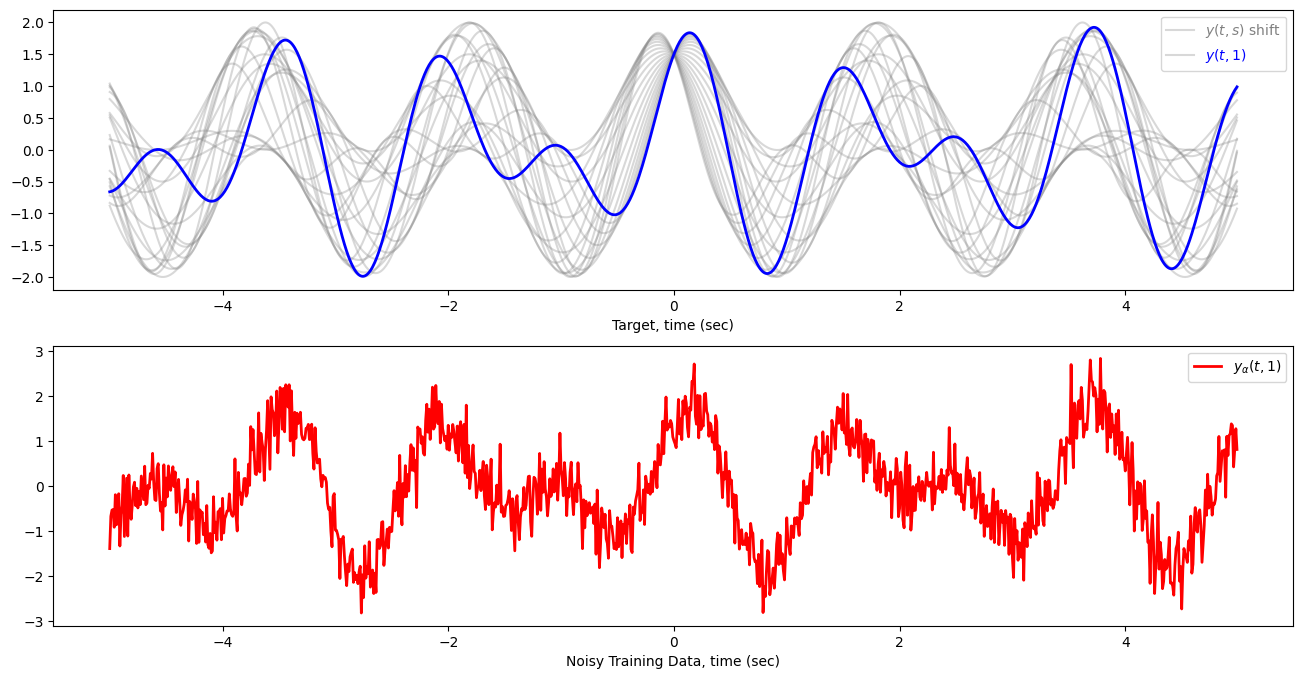

In [23]:
## Plotting simulated functional data

t_line = np.arange(-5., 5., 1/100.) # line space
alpha = 0.4
## Creating a function to produce cyclical y data.
def y_func(s):
    term1 = np.sin(s) * 2 * np.pi * t_line + np.pi/6
    y_target = np.sin(term1) + np.cos(2 * (np.sqrt(3)) * t_line)
    return y_target

y = y_func(1)
## Adding noise
noise = np.random.normal(0, 1, size=y.shape)
y_noisy = y + noise * alpha

## Plotting
fig, ax = plt.subplots(2,1, figsize=(16,8))
fval = np.arange(-1,1,0.1)

for i in fval:
    ax[0].plot(t_line, y_func(i), color='gray', alpha=.3,label="$sin(f)$ shift")

ax[0].plot(t_line, y, lw = 2,label = "fixed $f$",color="b")
ax[0].set_xlabel('Target, time (sec)')
ax[1].plot(t_line, y_noisy, lw = 2,c="r")
ax[1].set_xlabel('Noisy Training Data, time (sec)')
ax[0].legend(["$y(t,s)$ shift","$y(t,1)$"],labelcolor=["gray","b"])
ax[1].legend(["$y_{\\alpha}(t,1)$"])


In the figure above we can see the true output of the generating function, given a specific value of $s$ (blue), and various drifts according to different values of $s$ (gray).  In the bottom plot you can see the noisy data (training),  matching the blue graph in the top plot.

### Creating PyTorch RNN model

Here we create a basic PyTorch RNN class (inherits from `nn.Module`).  

* *input_size* – The number of expected features (dimensions) in the input t

* *hidden_size* – The number of features in the hidden state h

* *num_layers* – Number of recurrent layers. E.g., setting num_layers=2 would mean stacking two RNNs together to form a stacked RNN, with the second RNN taking in outputs of the first RNN and computing the final results.    

* batch_first – If True, then the input and output tensors are provided as (batch, seq, feature) instead of (seq, batch, feature). Note that this does not apply to hidden or cell states.




For more information, please check the
[PyTorch nn.RNN](https://pytorch.org/docs/stable/generated/torch.nn.RNN.html#torch.nn.RNN) documentation.


In [24]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(RNN, self).__init__()

        self.hidden_dim=hidden_dim

        # define an RNN with specified parameters
        # batch_first means that the first dim of the input and output will be the batch_size
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)

        # Adding a fully-connected layer
        self.fc = nn.Linear(hidden_dim, output_size)

    def forward(self, x, hidden):
        # x (batch_size, seq_length, input_size)
        # hidden (n_layers, batch_size, hidden_dim)
        # r_out (batch_size, time_step, hidden_size)
        batch_size = x.size(0)

        # get RNN outputs
        r_out, hidden = self.rnn(x, hidden)
        r_out = r_out.view(-1, self.hidden_dim)

        # get final output
        output = self.fc(r_out)

        return output, hidden


In [25]:

# RNN Hyperparameters
input_size=1 # our data is 1-dim
output_size=1
hidden_dim=16
n_layers=2

# instantiate an RNN model
rnn = RNN(input_size, output_size, hidden_dim, n_layers)
print(rnn)

RNN(
  (rnn): RNN(1, 16, num_layers=2, batch_first=True)
  (fc): Linear(in_features=16, out_features=1, bias=True)
)


### RNN Training

Now we need to define a training function that takes the following hyper-parameters:  

* rnn : the RNN model object
* n_steps = on how many steps ($t$) to train the model (equivalent to "epochs").
* lag = the steps/datapoints lag between the training and target data.
* alpha = how much noise to add to the training data
* seq_length = how many datapoints  (time-series steps) to consider in each "epoch": $(t-k:t)$
* stride = the window size of the function (of which the seq_length will be divided).
* print_every = how often (in steps) to print a plot of the prediction against the target.

At each step, we have a lagged value of x, noisy lagged value of x (training), and a value of y (target not lagged).

P3Q2:  (5pts)

Fill out the missing code according to the function definition above

In [29]:
# As above, creating a simulated data generator from our function (not noisy)
# this time, the function should depend on "step" as well (x_line is ever changing).

def y_func(s, x_line):
    return np.sin(np.sin(s) * 2 * np.pi * x_line + np.pi/6) + np.cos(2 * np.sqrt(3) * x_line)



In [30]:
# train the RNN
def train(rnn,y_func, n_steps, print_every,stride,seq_length,
          alpha,lag):
    # initialize the RNN hidden state
    hidden = None
    s = 1 # initialize f
    for batch_i, step in enumerate(range(n_steps)):
        # defining the training data

        # t_line = np.linspace(y_func(s,step),y_func(s,step)+stride,seq_length+stride)
        t_line =  np.linspace(step,step+stride, seq_length)
        data = y_func(s,t_line)
        noisy_data =  data + np.random.randn(len(t_line))*alpha
        # update f
        s += 0.05

        # prepare data for training
        data.resize((seq_length , 1)) # input_size=1
        noisy_data.resize((seq_length , 1)) # input_size=1
        # creating a lag in the noisy data aginst y
        x = noisy_data[:-lag]
        y = data[lag:]

        # convert data into Tensors
        x_tensor = torch.Tensor(x).unsqueeze(0) # unsqueeze gives a 1, batch_size dimension
        y_tensor = torch.Tensor(y)

        # outputs from the rnn
        prediction, hidden = rnn(x_tensor, hidden)

        ## Representing Memory ##
        # make a new variable for hidden and detach the hidden state from its history
        # this way, we don't backpropagate through the entire history
        hidden = hidden.data

        # calculate the loss
        loss = criterion(prediction, y_tensor)
        # zero out gradients
        optimizer.zero_grad()
        # calculate backprop and update weights
        loss.backward()
        optimizer.step()

        # plot loss and predictions
        if batch_i%print_every == 0:
            plt.plot(t_line[lag:], x, 'r.',label = "training")
            plt.plot(t_line[lag:], y, 'b.',label = "actual")
            plt.plot(t_line[lag:], prediction.data.numpy().flatten(), 'y.',label= "prediction") #
            plt.title("Loss: {:,}".format(loss.item()))
            plt.legend(loc="upper left")
            plt.show()

    return rnn

# MSE loss and Adam optimizer with a learning rate of 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01)

    
Train the RNN model on various hyper-parameters (defined below) and review the results.   


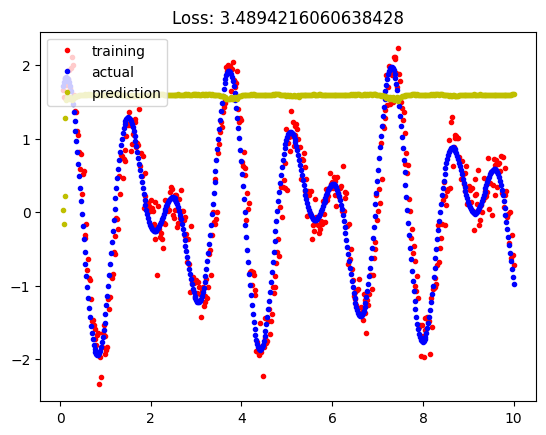

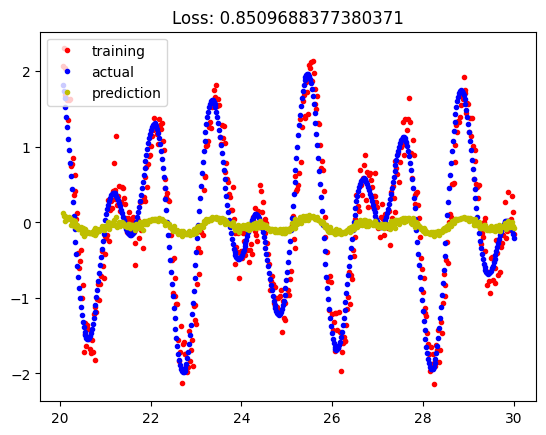

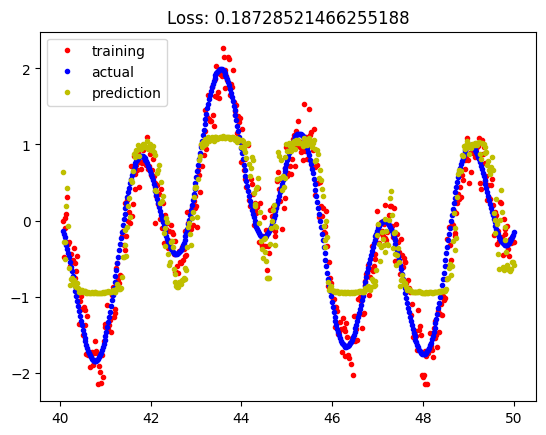

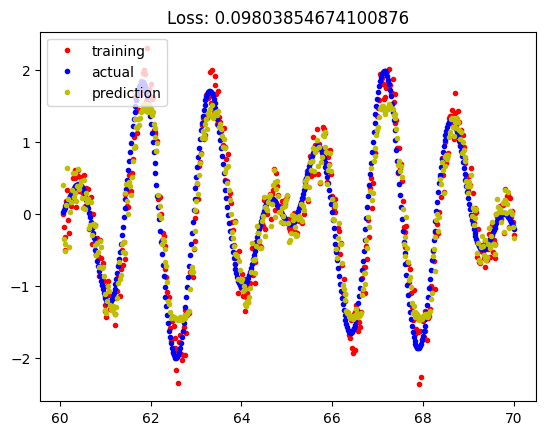

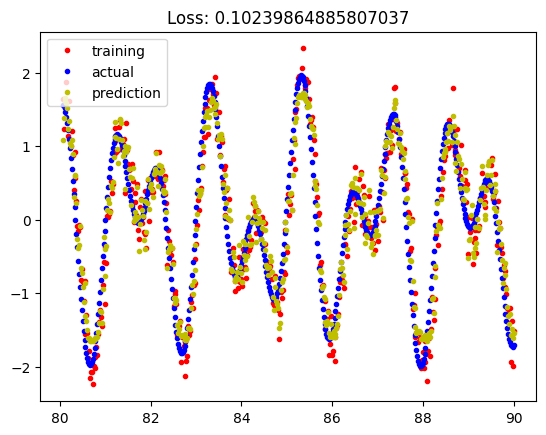

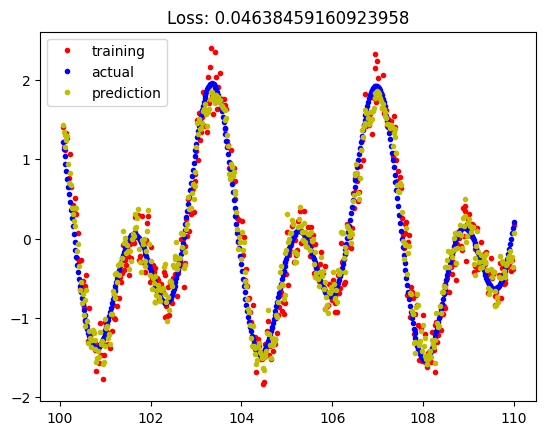

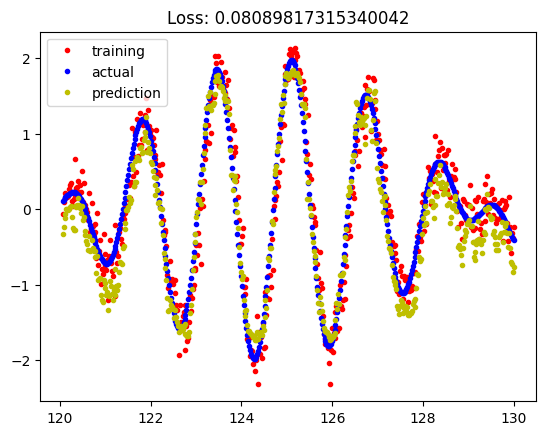

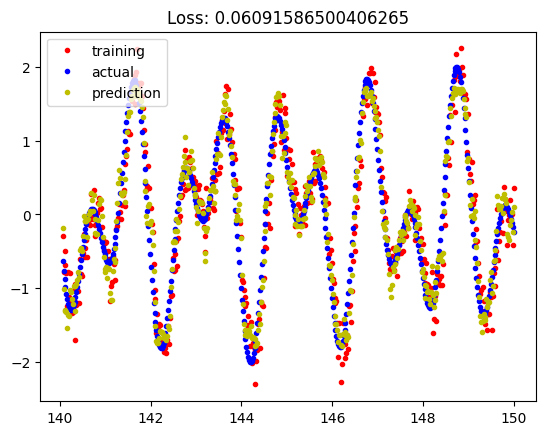

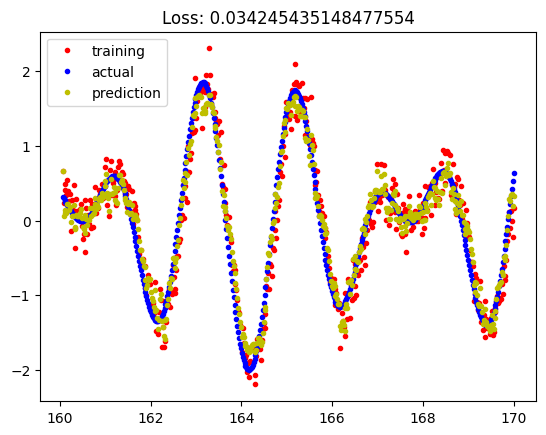

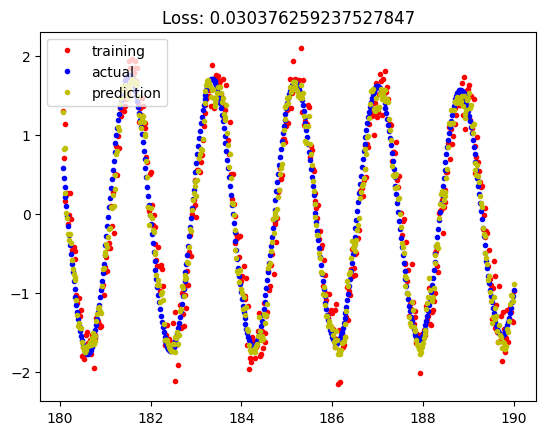

In [31]:

# train the rnn and monitor results

n_steps = 200
stride = 10
lag = 3
alpha = 0.2
seq_length = 500
print_every = 20

trained_rnn = train(rnn, y_func,  n_steps, print_every,
                    stride,seq_length,alpha,lag)

P3Q3: (10pts)

(a) Do you think our model performs well?     
(b) Write about the relationships and interplay between the different hyper-parameters, and explain how they effect the RNN model. Please relate also to the RNN architecture in our solution.

(c) Can you give a real world example where this type of model can be applied?   
(d) What would you change to improve it?

Write your solution here!

a. Yes, the model performed exceptionally well. The training result, with a final loss of approximately 0.0304, indicates a near-perfect fit. The visualization shows that the model's predictions (yellow) successfully and smoothly track the actual clean signal (blue), despite being trained on noisy training data.
b. The performance hinges on the careful balance of hyperparameters:
* seq_length (k): Must be long enough to capture the full period of the cyclical pattern for the model to effectively learn long-range dependencies.
* lag (l): Defines the forecasting horizon; a larger lag increases the difficulty of the prediction task.
* n_layers: Stacking layers adds depth, enabling the RNN to learn a hierarchy of features for complex signals.
* hidden_dim: This is the model's internal memory capacity. It must be large enough to store stable features to bridge the lag and filter out the noise.
c. This model architecture, is ideal for Predictive Systems, such as: temperature readings, vibration or voice data. The model is designed to learn the underlying trend from a highly noisy sequence of sensor data, allowing it to issue actionable forecasts despite real-world sensor noise.
d. Since the model brought excelent results the changed needed are minor and will be to improve stability (not preformence, since the preformance is already very good).
I would change the cell type to LSTM. The LSTM's internal gating mechanism prevents the vanishing gradient problem, ensuring the model remains robust and stable when predicting over time.
Also, I would add a Learning Rate Scheduler, make it higher in the beggining and then decrease it. This will result in faster convergnes.

THE END!